<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week2/Sklearn_Screencast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сегодня мы попробуем поработать с библиотекой scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стало популярной за большое количество алгоритмов и простоту использования. sklearn полезна для экспериментов,  написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду не оптимизированного кода и выбранного языка.



Возьмем стандартный датасет c помощью функции load_boston. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

# Регрессия

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()
data['feature_names']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Прочитать описание датасета можно выполнив строчку: `print(data['DESCR'])`

In [ ]:
# data

In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X, y = data['data'], data['target']

In [ ]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (506, 13)
Рaзмер вектора y:  (506,)


Посмотрим на наши данные. Давайте построим  график того, как зависит цена от криминогенной обстановки. Для этого воспользуемся библиотекой matplotlib.

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

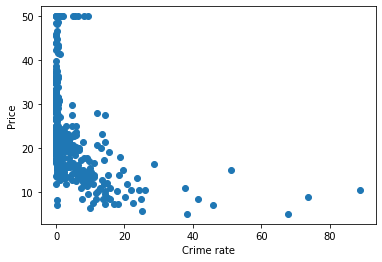

In [ ]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Как мы видим, все закономерно, дорогие квартиры находятся в районах с низким уровнем преступности.

In [ ]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model

В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.predict(X_test)

array([16.4 , 32.52, 21.38, 21.  , 20.5 , 22.14, 21.16, 37.56, 21.16,
       18.86, 20.18, 30.34, 12.66, 24.1 , 19.74, 42.92, 15.56, 15.06,
        9.48, 27.42, 22.14, 16.78, 21.2 , 23.68, 15.4 , 16.66, 21.36,
       32.6 , 14.16, 23.9 , 21.66, 23.68, 20.26, 25.9 , 20.  , 16.98,
       27.36, 41.16, 27.62, 31.48, 14.84, 34.12, 24.7 , 16.98, 24.  ,
       17.82, 24.7 , 16.74, 21.5 , 25.38, 32.54, 27.34, 20.7 ,  9.48,
       21.84, 24.78, 17.8 , 18.16, 28.6 , 17.92, 17.82, 25.58, 22.96,
       16.28,  9.88, 31.98, 19.68, 14.2 , 21.1 , 31.14, 26.22, 23.18,
       24.36, 29.02, 20.62, 21.14, 20.44, 30.34, 24.78, 41.28, 23.38,
       29.22, 21.26, 15.44, 24.68, 20.1 , 37.78, 24.66, 23.68, 27.26,
       11.9 , 19.46, 36.16, 22.4 , 28.38, 21.76, 20.1 , 22.14, 33.06,
       22.66, 20.58, 22.2 ])

In [ ]:
predictions = knn.predict(X_test)

Отлично! Мы получили предсказания. Посчитаем метрику, соответствующая функция есть в scikit-learn! Будет считать средне квадратичную ошибку, так как мы решаем задачу регрессии.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, predictions)

38.66401176470589

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000000000)
# 19 59
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)
knn.fit(X_train, y_train)
mean_squared_error(y_test, knn.predict(X_test))

32.40204313725489

Давайте попробуем сделать лучше! У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={
                                        # 'n_neighbors': range(1, 40, 2),
                                        'n_neighbors': [1, 5, 10, 20],
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)
https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [ ]:
grid_searcher.fit(X_train, y_train)

In [ ]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Попросим предсказание лучшей модели.

In [ ]:
best_predictions = grid_searcher.predict(X_test)
# best_predictions

In [ ]:
mean_squared_error(y_test, best_predictions)

25.154307270351957

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке 


In [ ]:
metrics = []
for n in range(1, 30, 3):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  metrics.append(mean_squared_error(y_test, knn.predict(X_test)))

Text(0.5, 0, 'Number of neightbors')

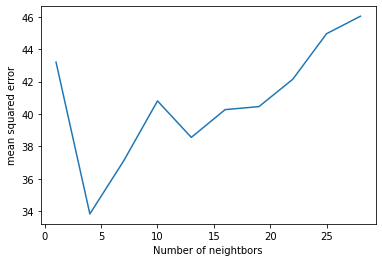

In [ ]:
plt.plot(range(1, 30, 3), metrics)
plt.ylabel('mean squared error')
plt.xlabel('Number of neightbors')

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
metrics = []
for n in range(1, 40, 2):
  knn = KNeighborsRegressor(n_neighbors=n)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  metrics.append(np.mean(scores))

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Number of neightbors')

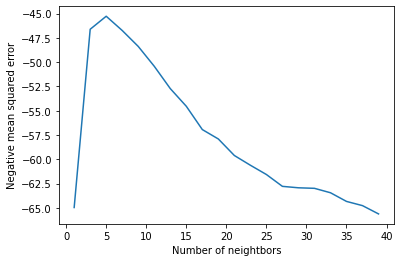

In [ ]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

# Классификация

## На занятии.

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)

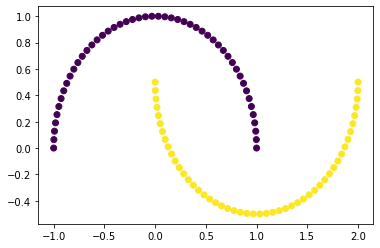

In [ ]:
X_simple, y_simple = make_moons()
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple)

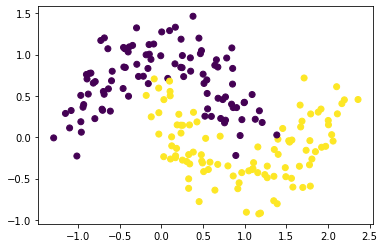

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Мы получили два слегка зашумленных месяца. Давайте обучим knn на этих данных и визуализируем пространство предсказаний.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape
# X_test.shape
y_train.shape

(160,)

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, knn_clf.predict(X_test))

0.925

Для визуализации построим массив, который будет содержать в себе все точки в окрестности данных с некоторым шагом.

In [ ]:
# np.linspace
# (начало массива, конец массива и количество точек)
# возвращается массив от начала до конца с каким-то шагом.

In [ ]:
x_space = np.linspace(-2, 3, 100)

In [ ]:
# np.meshgrid()
# принимает набор аргументов и возвращает
# матрицы, которые как раз и будут соответствовать
# каждой точке нашего вот этого прямоугольника, пространство, где мы хотим делать предсказания.

In [ ]:
x_grid, y_grid = np.meshgrid(x_space, x_space)

In [ ]:
x_grid

array([[-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ],
       [-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ],
       [-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ],
       ...,
       [-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ],
       [-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ],
       [-2.        , -1.94949495, -1.8989899 , ...,  2.8989899 ,
         2.94949495,  3.        ]])

In [ ]:
y_grid

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.9798995 , -1.9798995 , -1.9798995 , ..., -1.9798995 ,
        -1.9798995 , -1.9798995 ],
       [-1.95979899, -1.95979899, -1.95979899, ..., -1.95979899,
        -1.95979899, -1.95979899],
       ...,
       [ 1.95979899,  1.95979899,  1.95979899, ...,  1.95979899,
         1.95979899,  1.95979899],
       [ 1.9798995 ,  1.9798995 ,  1.9798995 , ...,  1.9798995 ,
         1.9798995 ,  1.9798995 ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

в массиве x_grid. Мы видим, что там лежит копия
одного и того же массива, просто от -2 до 2, то есть по сути мы
получили координаты каждой точки вдоль оси x.
Если мы посмотрим на y_grid, мы увидим, что там тоже копия одного и того же массива,
просто теперь вдоль оси y. Если эти два массива объединю и превращу каждый элемент этого
в точку, то я получу то, что мне нужно.

In [ ]:
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  3.        ],
       [ 2.94949495,  3.        ],
       [ 3.        ,  3.        ]])

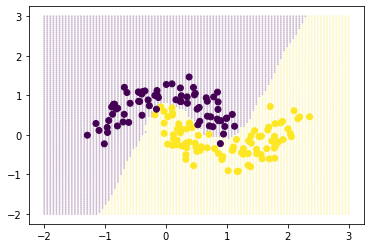

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1], c=knn_clf.predict(xy), alpha=0.2, s=1) #s - это сайз - размер точки. alpha=0.2 - сделали прозрачными точки.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Несмотря на шум, который здесь возникает, мы все равно
смогли правильно и хорошо решить задачу. Вот если мы уменьшим количество соседей,
то, что произойдет. Вот эти шумовые клетки, они станут влиять на нашу кривую более сильно.
Соответственно, здесь появятся регионы, где мы предсказываем желтый цвет,
если мы проделаем обратную вещь и увеличим количество соседей, то наша
кривая будет зарубляться и в итоге превратится просто в прямую.

## Изначальный ноут.

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Мы получили два слегка зашумленных месяца. Давайте обучим knn на этих данных и визуализируем пространство предсказаний.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X, y)

Для визуализации построим массив, который будет содержать в себе все точки в окрестности данных с некоторым шагом.

In [ ]:
x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

In [ ]:
predicted = knn_clf.predict(xy)

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.2, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

На картинке вы можете увидеть исходные данные и границу, которую knn возвел между классами. Поэксперементируйте с параметром n_neighbors и посмотрите, как он влияет на итоговый результат.